In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, pearsonr
sns.set_theme(style="whitegrid")

In [33]:
try:
    df = pd.read_csv('student-mat.csv', sep=';')
    print(f"Dados carregados com sucesso: {len(df)} registros de estudantes.")
except FileNotFoundError:
    print("Erro: O arquivo 'student-mat.csv' não foi encontrado!")
    exit()

# Estatísticas descritivas para a nota final G3
print("\n" + "="*60)
print("ESTATÍSTICAS DESCRITIVAS DA NOTA FINAL (G3)")
print("="*60)
print(f"Média da nota G3: {df['G3'].mean():.2f}")
print(f"Desvio padrão da nota G3: {df['G3'].std():.2f}")
print(f"Nota mínima em G3: {df['G3'].min():.2f}")
print(f"Nota máxima em G3: {df['G3'].max():.2f}")

# Categorização auxiliar (para análise descritiva apenas)
nota_limite = 14  # 70% de 20
df['acima_70_porcento_g3'] = np.where(df['G3'] >= nota_limite, 'Sim', 'Não')

Dados carregados com sucesso: 395 registros de estudantes.

ESTATÍSTICAS DESCRITIVAS DA NOTA FINAL (G3)
Média da nota G3: 10.42
Desvio padrão da nota G3: 4.58
Nota mínima em G3: 0.00
Nota máxima em G3: 20.00


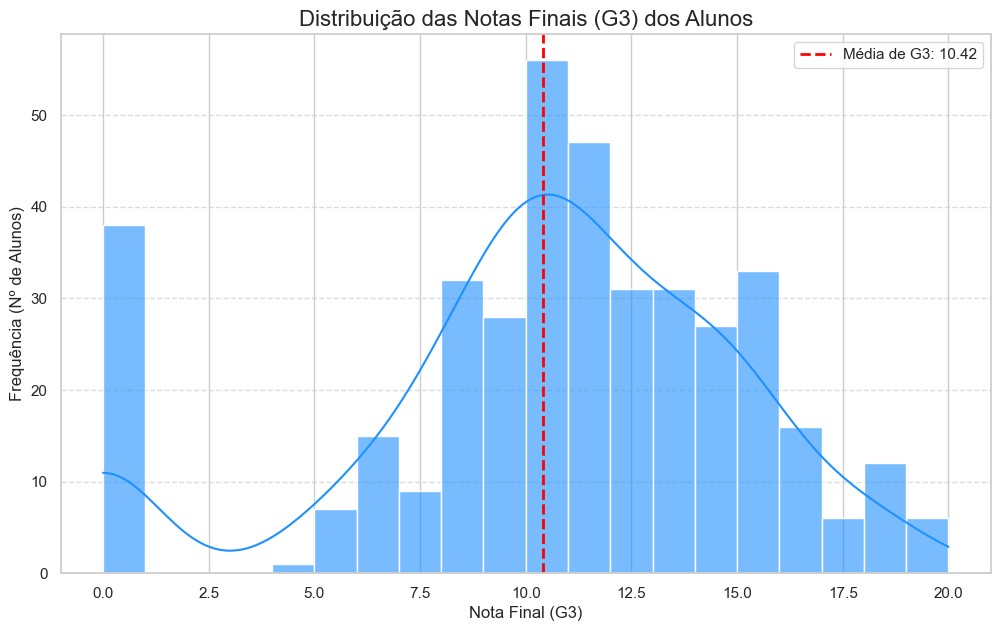

In [34]:
# Define o tamanho da figura
plt.figure(figsize=(12, 7))

# Cria o histograma das notas finais (G3)
# O argumento kde=True adiciona uma linha de estimativa de densidade
sns.histplot(data=df, x='G3', kde=True, bins=20, alpha=0.6, color='dodgerblue')
overall_mean_g3 = df['G3'].mean()
# Adiciona uma linha vertical para marcar a média de G3 (calculada na Célula 1)
# A variável 'overall_mean_g3' foi criada na célula anterior
plt.axvline(x=overall_mean_g3, color='red', linestyle='--', linewidth=2, label=f'Média de G3: {overall_mean_g3:.2f}')

# Adiciona títulos e legendas para maior clareza
plt.title('Distribuição das Notas Finais (G3) dos Alunos', fontsize=16)
plt.xlabel('Nota Final (G3)', fontsize=12)
plt.ylabel('Frequência (Nº de Alunos)', fontsize=12)
plt.legend() # Exibe a legenda

# Adiciona uma grade para facilitar a leitura (opcional)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostra o gráfico
plt.show()


CORRELAÇÃO DE SPEARMAN: TEMPO DE ESTUDO vs NOTA G3
Coeficiente de Spearman: 0.1052
Valor p: 0.0367

✅ Existe uma correlação MONOTÔNICA estatisticamente significativa entre tempo de estudo e nota G3.


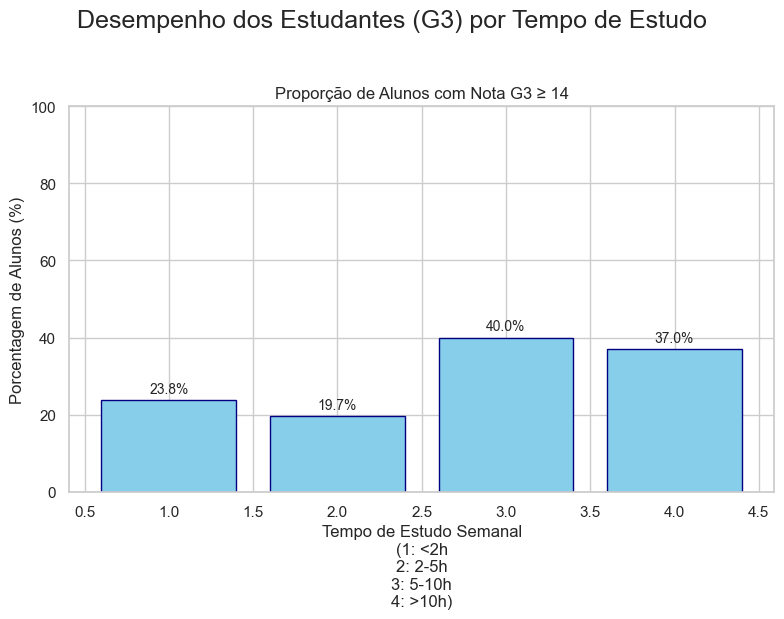

In [38]:
# Correlação de Spearman entre studytime e G3
print("\n" + "="*60)
print("CORRELAÇÃO DE SPEARMAN: TEMPO DE ESTUDO vs NOTA G3")
print("="*60)

spearman_corr, spearman_p = spearmanr(df['studytime'], df['G3'])
print(f"Coeficiente de Spearman: {spearman_corr:.4f}")
print(f"Valor p: {spearman_p:.4f}")

if spearman_p < 0.05:
    print("\n✅ Existe uma correlação MONOTÔNICA estatisticamente significativa entre tempo de estudo e nota G3.")
else:
    print("\n❌ Não foi encontrada correlação monotônica significativa entre tempo de estudo e nota G3.")

# VISUALIZAÇÃO: Proporção de alunos com G3 ≥ 14
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle('Desempenho dos Estudantes (G3) por Tempo de Estudo', fontsize=18, y=1.03)

studytime_labels = '1: <2h\n2: 2-5h\n3: 5-10h\n4: >10h'

# Gráfico: Proporção de alunos com G3 >= 14
prop_data = df.groupby('studytime')['acima_70_porcento_g3'].apply(lambda x: (x == 'Sim').mean() * 100).fillna(0)
bars = ax.bar(prop_data.index, prop_data.values, color='skyblue', edgecolor='navy')
ax.set_title('Proporção de Alunos com Nota G3 ≥ 14')
ax.set_xlabel(f'Tempo de Estudo Semanal\n({studytime_labels})')
ax.set_ylabel('Porcentagem de Alunos (%)')
ax.set_ylim(0, 100)

# Adiciona os rótulos nas barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



ANÁLISE 1: DISTRIBUIÇÃO POR Nº DE REPROVAÇÕES ANTERIORES
          Total_Alunos  Media_G3  Desvio_Padrao_G3  Qtd_Acima_70_g3  \
failures                                                              
0                  312     11.25              4.17               97   
1                   50      8.12              4.71                2   
2                   17      6.24              4.84                1   
3                   16      5.69              4.19                0   

          %_Acima_70_g3  
failures                 
0                  31.1  
1                   4.0  
2                   5.9  
3                   0.0  

CORRELAÇÃO DE SPEARMAN: Nº DE REPROVAÇÕES vs NOTA G3
Coeficiente de Spearman: -0.3612
Valor p: 0.0000

✅ Existe uma correlação MONOTÔNICA estatisticamente significativa entre nº de reprovações e nota G3.


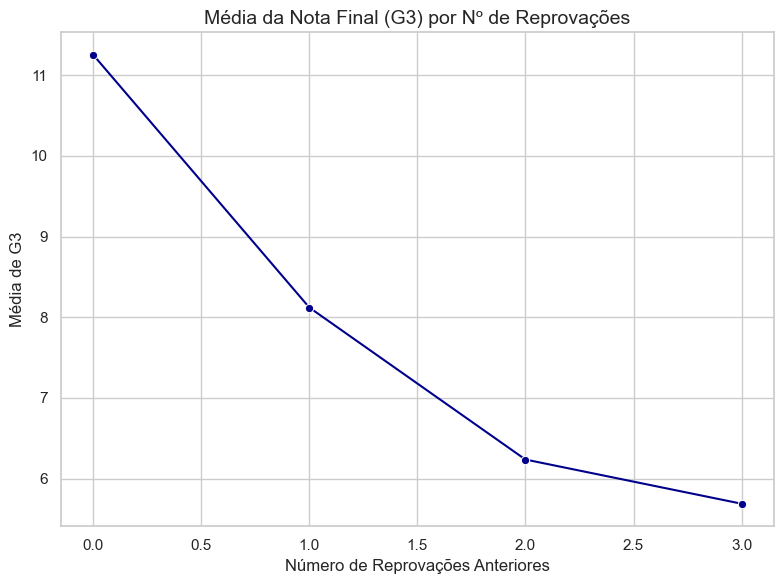

In [40]:
print("\n" + "="*60)
print("ANÁLISE 1: DISTRIBUIÇÃO POR Nº DE REPROVAÇÕES ANTERIORES")
print("="*60)

analise_reprovacoes = df.groupby('failures').agg(
    Total_Alunos=('G3', 'count'),
    Media_G3=('G3', 'mean'),
    Desvio_Padrao_G3=('G3', 'std'),
    Qtd_Acima_70_g3=('acima_70_porcento_g3', lambda x: (x == 'Sim').sum())
).round(2)

analise_reprovacoes['%_Acima_70_g3'] = (
    analise_reprovacoes['Qtd_Acima_70_g3'] / analise_reprovacoes['Total_Alunos'] * 100
).round(1)
print(analise_reprovacoes)

# Correlação de Spearman
print("\n" + "="*60)
print("CORRELAÇÃO DE SPEARMAN: Nº DE REPROVAÇÕES vs NOTA G3")
print("="*60)

spearman_corr, spearman_p = spearmanr(df['failures'], df['G3'])

print(f"Coeficiente de Spearman: {spearman_corr:.4f}")
print(f"Valor p: {spearman_p:.4f}")

if spearman_p < 0.05:
    print("\n✅ Existe uma correlação MONOTÔNICA estatisticamente significativa entre nº de reprovações e nota G3.")
else:
    print("\n❌ Não há correlação estatisticamente significativa entre nº de reprovações e nota G3.")

# Gráfico: Média de G3 por número de reprovações
plt.figure(figsize=(8, 6))
media_g3_por_reprov = df.groupby('failures')['G3'].mean()
sns.lineplot(x=media_g3_por_reprov.index, y=media_g3_por_reprov.values, marker='o', color='darkblue')
plt.title('Média da Nota Final (G3) por Nº de Reprovações', fontsize=14)
plt.xlabel('Número de Reprovações Anteriores')
plt.ylabel('Média de G3')
plt.grid(True)
plt.tight_layout()
plt.show()



CORRELAÇÃO DE PEARSON: higher (binária) vs G3
Coeficiente de Pearson: 0.1825
Valor p: 0.0003

✅ Correlação linear estatisticamente significativa entre aspiração ao ensino superior e nota final G3.


C:\Users\diego\AppData\Local\Temp\ipykernel_11856\3170927318.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='higher', y='G3', data=media_g3_por_higher, palette='magma')


Text(0, 0.5, 'Média de Nota Final (G3)')

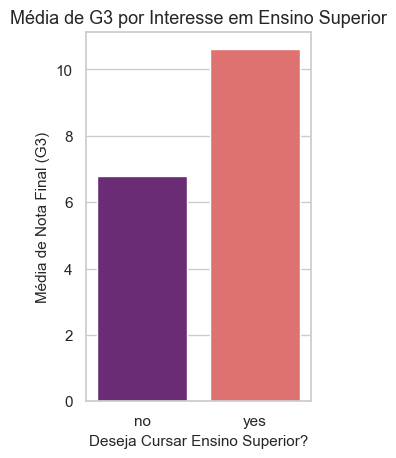

In [41]:


# Codificar higher para 0/1
df['higher_cod'] = df['higher'].map({'no': 0, 'yes': 1})

# Correlação de Pearson
print("\n" + "="*60)
print("CORRELAÇÃO DE PEARSON: higher (binária) vs G3")
print("="*60)

pearson_corr, pearson_p = pearsonr(df['higher_cod'], df['G3'])

print(f"Coeficiente de Pearson: {pearson_corr:.4f}")
print(f"Valor p: {pearson_p:.4f}")

if pearson_p < 0.05:
    print("\n✅ Correlação linear estatisticamente significativa entre aspiração ao ensino superior e nota final G3.")
else:
    print("\n❌ Não há correlação estatisticamente significativa entre higher e G3.")

sns.set_theme(style="whitegrid")

plt.subplot(1, 2, 2)
media_g3_por_higher = df.groupby('higher')['G3'].mean().reset_index()
sns.barplot(x='higher', y='G3', data=media_g3_por_higher, palette='magma')
plt.title('Média de G3 por Interesse em Ensino Superior', fontsize=13)
plt.xlabel('Deseja Cursar Ensino Superior?', fontsize=11)
plt.ylabel('Média de Nota Final (G3)', fontsize=11)

CORRELAÇÃO DE PEARSON: FALTAS vs NOTA FINAL (G3)
Coeficiente de Pearson: 0.0342
Valor p: 0.4973

❌ Não há correlação linear significativa entre faltas e G3.


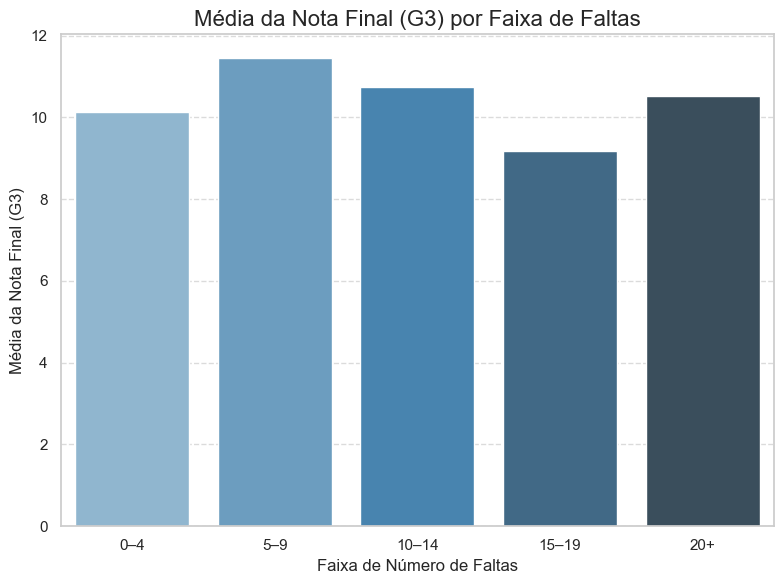

In [42]:
# Correlação de Pearson entre faltas e nota final
pearson_corr, pearson_p = pearsonr(df['absences'], df['G3'])

print("CORRELAÇÃO DE PEARSON: FALTAS vs NOTA FINAL (G3)")
print("="*60)
print(f"Coeficiente de Pearson: {pearson_corr:.4f}")
print(f"Valor p: {pearson_p:.4f}")

if pearson_p < 0.05:
    print("\n✅ Existe uma correlação linear estatisticamente significativa entre faltas e G3.")
else:
    print("\n❌ Não há correlação linear significativa entre faltas e G3.")

# Criar faixas (bins) de faltas
bins = [0, 4, 9, 14, 19, 100]
labels = ['0–4', '5–9', '10–14', '15–19', '20+']
df['faixa_faltas'] = pd.cut(df['absences'], bins=bins, labels=labels, include_lowest=True)

# Calcular média da nota G3 por faixa
media_por_faixa = df.groupby('faixa_faltas', observed=False)['G3'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(
    data=media_por_faixa,
    x='faixa_faltas',
    y='G3',
    palette='Blues_d',
    hue='faixa_faltas',
    legend=False
)
plt.title('Média da Nota Final (G3) por Faixa de Faltas', fontsize=16)
plt.xlabel('Faixa de Número de Faltas', fontsize=12)
plt.ylabel('Média da Nota Final (G3)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


CORRELAÇÃO DE PEARSON: Apoio Escolar (schoolsup) vs Nota Final (G3)
Coeficiente de Pearson: -0.0828
Valor p: 0.1004

❌ Não há correlação estatisticamente significativa entre receber apoio escolar e a nota final.


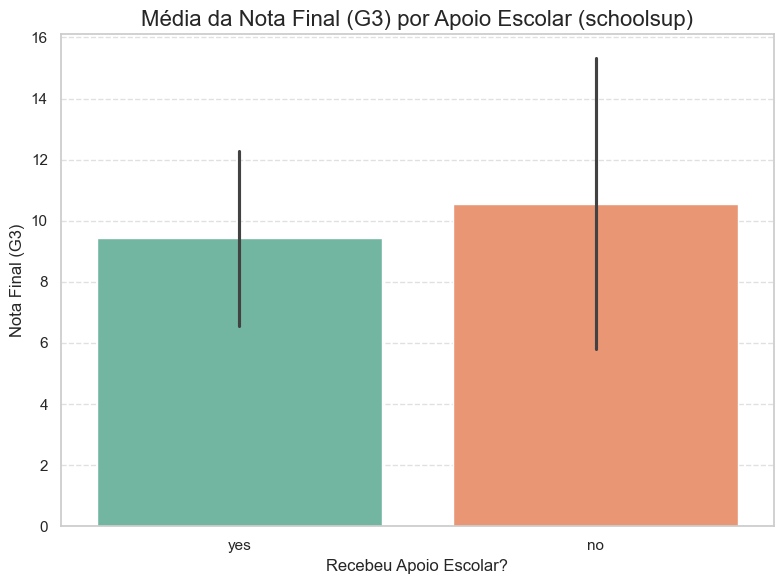

In [43]:
df['schoolsup_bin'] = df['schoolsup'].map({'no': 0, 'yes': 1})

# Calcular correlação de Pearson
pearson_corr, pearson_p = pearsonr(df['schoolsup_bin'], df['G3'])

# Exibir resultados
print("CORRELAÇÃO DE PEARSON: Apoio Escolar (schoolsup) vs Nota Final (G3)")
print("="*60)
print(f"Coeficiente de Pearson: {pearson_corr:.4f}")
print(f"Valor p: {pearson_p:.4f}")

if pearson_p < 0.05:
    print("\n✅ Existe uma correlação estatisticamente significativa entre receber apoio escolar e a nota final.")
else:
    print("\n❌ Não há correlação estatisticamente significativa entre receber apoio escolar e a nota final.")
    
plt.figure(figsize=(8, 6))
sns.barplot(
    x='schoolsup',
    y='G3',
    data=df,
    palette='Set2',
    errorbar='sd',
    hue='schoolsup',
    legend=False
)

plt.title('Média da Nota Final (G3) por Apoio Escolar (schoolsup)', fontsize=16)
plt.xlabel('Recebeu Apoio Escolar?', fontsize=12)
plt.ylabel('Nota Final (G3)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

CORRELAÇÃO DE PEARSON: Apoio Familiar (famsup) vs Nota Final (G3)
Coeficiente de Pearson: -0.0392
Valor p: 0.4377

❌ Não há correlação estatisticamente significativa entre apoio familiar e a nota final.


C:\Users\diego\AppData\Local\Temp\ipykernel_11856\1089031605.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='famsup', y='G3', palette='pastel', ci='sd')
C:\Users\diego\AppData\Local\Temp\ipykernel_11856\1089031605.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='famsup', y='G3', palette='pastel', ci='sd')


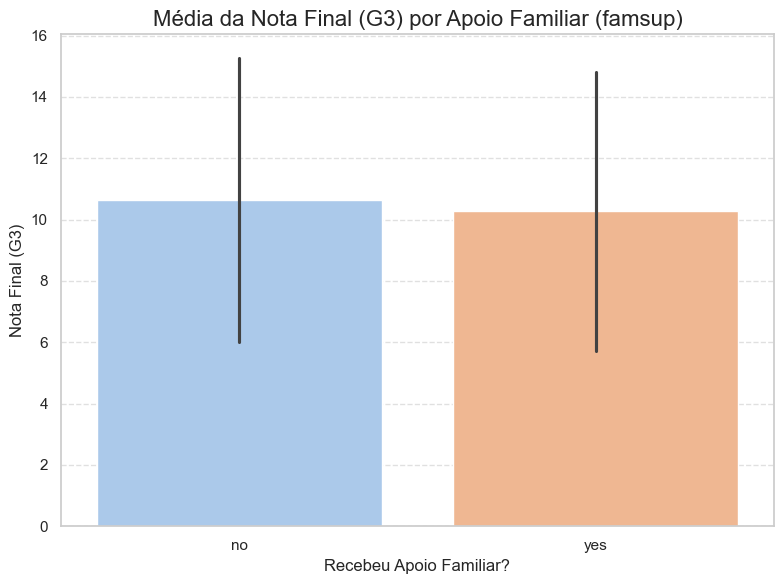

In [44]:
from scipy.stats import pearsonr

# Codifica famsup como variável binária: 0 = não, 1 = sim
df['famsup_bin'] = df['famsup'].map({'no': 0, 'yes': 1})

# Calcula correlação de Pearson
pearson_corr_fam, pearson_p_fam = pearsonr(df['famsup_bin'], df['G3'])

# Exibe resultados
print("CORRELAÇÃO DE PEARSON: Apoio Familiar (famsup) vs Nota Final (G3)")
print("="*60)
print(f"Coeficiente de Pearson: {pearson_corr_fam:.4f}")
print(f"Valor p: {pearson_p_fam:.4f}")

if pearson_p_fam < 0.05:
    print("\n✅ Existe uma correlação estatisticamente significativa entre apoio familiar e a nota final.")
else:
    print("\n❌ Não há correlação estatisticamente significativa entre apoio familiar e a nota final.")

# Gráfico de barras para visualizar a média da nota G3 por presença de apoio familiar
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='famsup', y='G3', palette='pastel', ci='sd')

plt.title('Média da Nota Final (G3) por Apoio Familiar (famsup)', fontsize=16)
plt.xlabel('Recebeu Apoio Familiar?', fontsize=12)
plt.ylabel('Nota Final (G3)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



CORRELAÇÃO DE PEARSON: Aulas Pagas (paid) vs Nota Final (G3)
Coeficiente de Pearson: 0.1020
Valor p: 0.0428

✅ Existe uma correlação estatisticamente significativa entre ter aulas pagas e a nota final.


C:\Users\diego\AppData\Local\Temp\ipykernel_11856\3341960174.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='paid', y='G3', palette='Set3', errorbar=None)


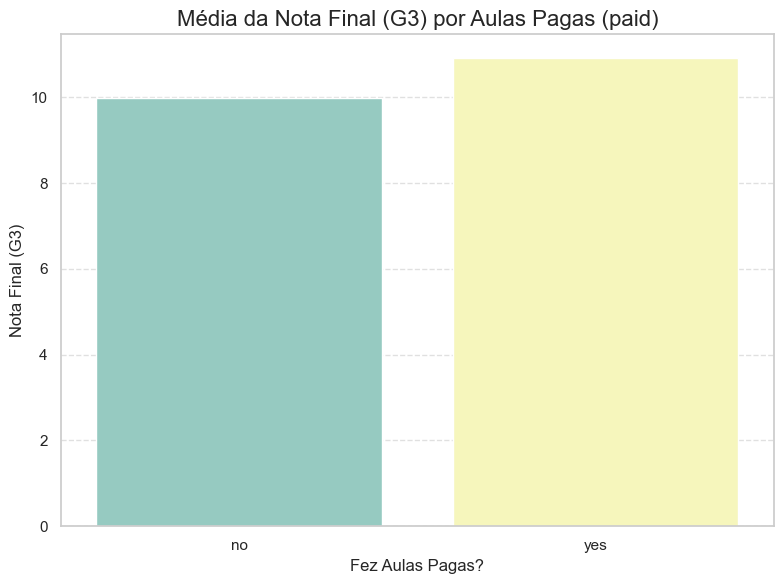

In [47]:

# Codificar paid como variável binária: 0 = não, 1 = sim
df['paid_bin'] = df['paid'].map({'no': 0, 'yes': 1})

# Calcular correlação de Pearson
pearson_corr_paid, pearson_p_paid = pearsonr(df['paid_bin'], df['G3'])

# Exibir resultados
print("CORRELAÇÃO DE PEARSON: Aulas Pagas (paid) vs Nota Final (G3)")
print("="*60)
print(f"Coeficiente de Pearson: {pearson_corr_paid:.4f}")
print(f"Valor p: {pearson_p_paid:.4f}")

if pearson_p_paid < 0.05:
    print("\n✅ Existe uma correlação estatisticamente significativa entre ter aulas pagas e a nota final.")
else:
    print("\n❌ Não há correlação estatisticamente significativa entre ter aulas pagas e a nota final.")

# Gráfico de barras com a média das notas finais (G3) por grupo de aulas pagas
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='paid', y='G3', palette='Set3', errorbar=None)

plt.title('Média da Nota Final (G3) por Aulas Pagas (paid)', fontsize=16)
plt.xlabel('Fez Aulas Pagas?', fontsize=12)
plt.ylabel('Nota Final (G3)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



CORRELAÇÃO DE PEARSON: Atividades Extracurriculares (activities) vs Nota Final (G3)
Coeficiente de Pearson: 0.0161
Valor p: 0.7497

❌ Não há correlação estatisticamente significativa entre participar de atividades e a nota final.


C:\Users\diego\AppData\Local\Temp\ipykernel_11856\921313732.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='activities', y='G3', palette='Accent')


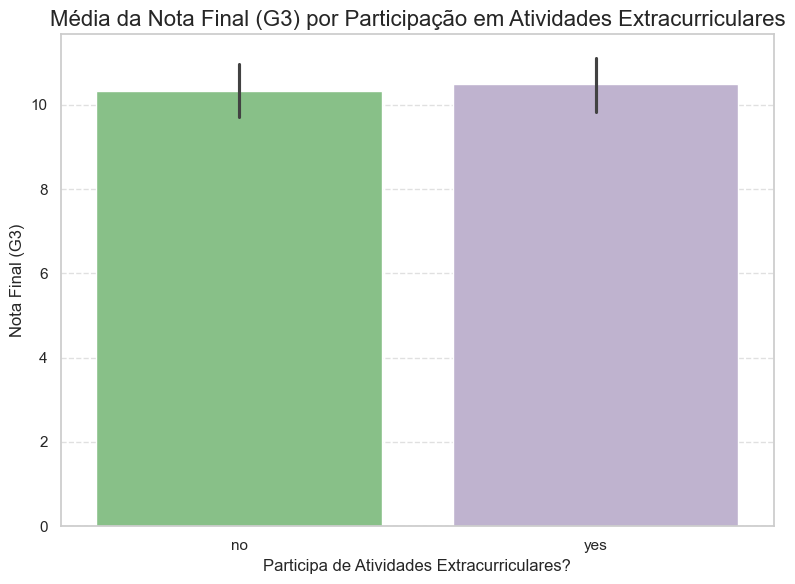

In [48]:


# Codificar 'activities' como 0 = não participa, 1 = participa
df['activities_bin'] = df['activities'].map({'no': 0, 'yes': 1})

# Calcular a correlação de Pearson
pearson_corr_activities, pearson_p_activities = pearsonr(df['activities_bin'], df['G3'])

# Exibir resultados
print("CORRELAÇÃO DE PEARSON: Atividades Extracurriculares (activities) vs Nota Final (G3)")
print("="*60)
print(f"Coeficiente de Pearson: {pearson_corr_activities:.4f}")
print(f"Valor p: {pearson_p_activities:.4f}")

if pearson_p_activities < 0.05:
    print("\n✅ Existe uma correlação estatisticamente significativa entre participar de atividades e a nota final.")
else:
    print("\n❌ Não há correlação estatisticamente significativa entre participar de atividades e a nota final.")
# Gráfico simples: média da G3 por participação em atividades extracurriculares
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='activities', y='G3', palette='Accent')

plt.title('Média da Nota Final (G3) por Participação em Atividades Extracurriculares', fontsize=16)
plt.xlabel('Participa de Atividades Extracurriculares?', fontsize=12)
plt.ylabel('Nota Final (G3)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



CORRELAÇÃO DE PEARSON: Acesso à Internet vs Nota Final (G3)
Coeficiente de Pearson: 0.0985
Valor p: 0.0505

❌ Não há correlação estatisticamente significativa entre ter acesso à internet e a nota final.


C:\Users\diego\AppData\Local\Temp\ipykernel_11856\3486780387.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='internet', y='G3', palette='Set1')


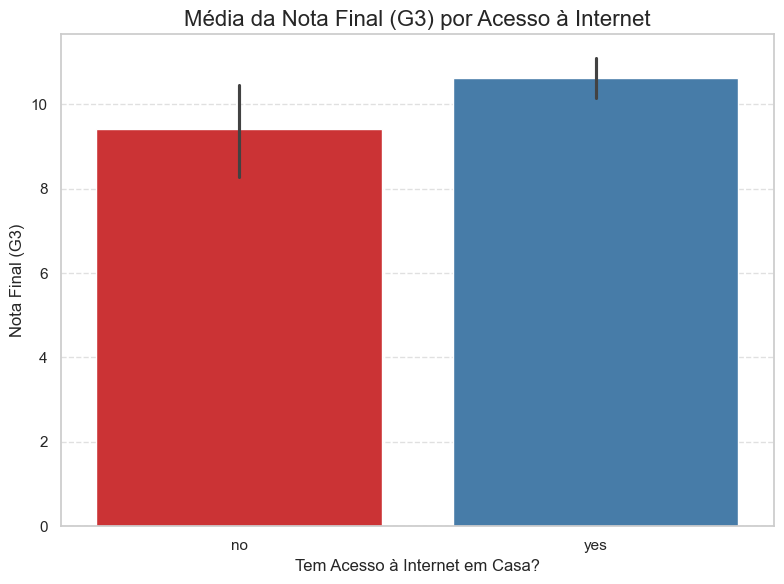

In [49]:


# Codificar 'internet' como 0 = não tem, 1 = tem
df['internet_bin'] = df['internet'].map({'no': 0, 'yes': 1})

# Calcular correlação de Pearson
pearson_corr_internet, pearson_p_internet = pearsonr(df['internet_bin'], df['G3'])

# Exibir resultados
print("CORRELAÇÃO DE PEARSON: Acesso à Internet vs Nota Final (G3)")
print("="*60)
print(f"Coeficiente de Pearson: {pearson_corr_internet:.4f}")
print(f"Valor p: {pearson_p_internet:.4f}")

if pearson_p_internet < 0.05:
    print("\n✅ Existe uma correlação estatisticamente significativa entre ter acesso à internet e a nota final.")
else:
    print("\n❌ Não há correlação estatisticamente significativa entre ter acesso à internet e a nota final.")
# Gráfico de barras: média de G3 por grupo (tem ou não internet)
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='internet', y='G3', palette='Set1')

plt.title('Média da Nota Final (G3) por Acesso à Internet', fontsize=16)
plt.xlabel('Tem Acesso à Internet em Casa?', fontsize=12)
plt.ylabel('Nota Final (G3)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



CORRELAÇÃO DE SPEARMAN: Saúde Autodeclarada (health) vs Nota Final (G3)
Coeficiente de Spearman: -0.0478
Valor p: 0.3435

❌ Não há correlação significativa entre nível de saúde e a nota final.


C:\Users\diego\AppData\Local\Temp\ipykernel_11856\3171270967.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='health', y='G3', palette='YlGnBu')


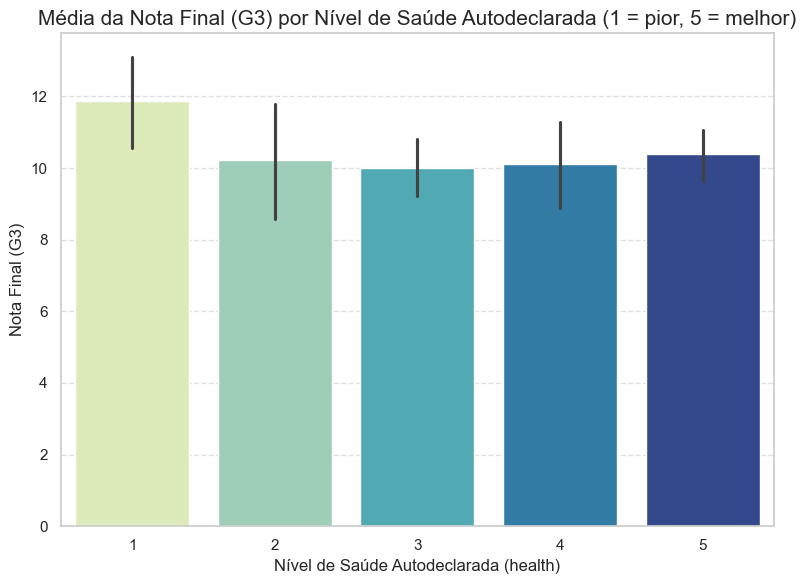

In [50]:


# Calcular a correlação de Spearman entre health e G3
spearman_corr_health, spearman_p_health = spearmanr(df['health'], df['G3'])

# Exibir resultados
print("CORRELAÇÃO DE SPEARMAN: Saúde Autodeclarada (health) vs Nota Final (G3)")
print("="*60)
print(f"Coeficiente de Spearman: {spearman_corr_health:.4f}")
print(f"Valor p: {spearman_p_health:.4f}")

if spearman_p_health < 0.05:
    print("\n✅ Existe uma correlação monotônica estatisticamente significativa entre nível de saúde e a nota final.")
else:
    print("\n❌ Não há correlação significativa entre nível de saúde e a nota final.")

# Gráfico de barras: média da nota G3 para cada nível de health
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='health', y='G3', palette='YlGnBu')

plt.title('Média da Nota Final (G3) por Nível de Saúde Autodeclarada (1 = pior, 5 = melhor)', fontsize=15)
plt.xlabel('Nível de Saúde Autodeclarada (health)', fontsize=12)
plt.ylabel('Nota Final (G3)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



CORRELAÇÃO DE PEARSON: Nota G1 vs Nota Final G3
Coeficiente de Pearson: 0.8015
Valor p: 0.0000

✅ Existe uma correlação linear estatisticamente significativa entre G1 e G3.


C:\Users\diego\AppData\Local\Temp\ipykernel_11856\3971788865.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_g3_por_faixa_g1 = df.groupby('faixa_G1')['G3'].mean().reset_index()
C:\Users\diego\AppData\Local\Temp\ipykernel_11856\3971788865.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_g3_por_faixa_g1, x='faixa_G1', y='G3', palette='Blues')


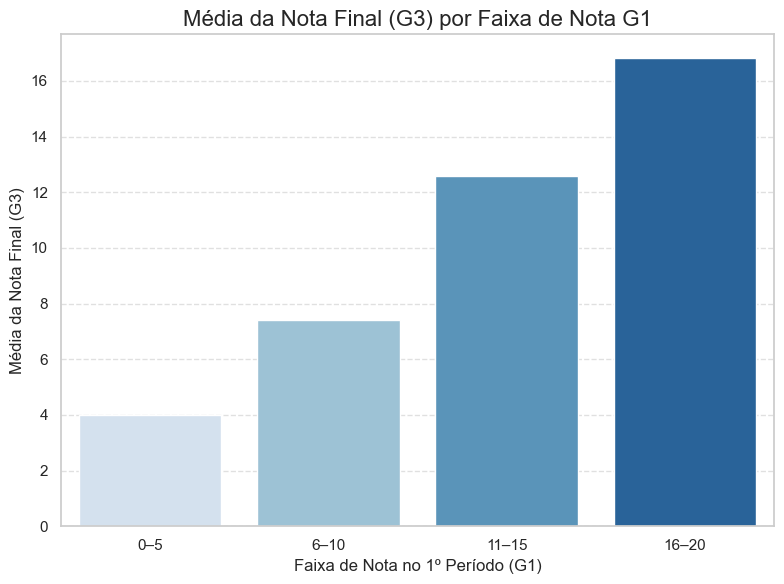

In [51]:
# Calcular correlação de Pearson entre G1 e G3
pearson_corr_g1_g3, pearson_p_g1_g3 = pearsonr(df['G1'], df['G3'])

# Exibir os resultados
print("CORRELAÇÃO DE PEARSON: Nota G1 vs Nota Final G3")
print("="*60)
print(f"Coeficiente de Pearson: {pearson_corr_g1_g3:.4f}")
print(f"Valor p: {pearson_p_g1_g3:.4f}")

if pearson_p_g1_g3 < 0.05:
    print("\n✅ Existe uma correlação linear estatisticamente significativa entre G1 e G3.")
else:
    print("\n❌ Não há correlação linear significativa entre G1 e G3.")

# Criar faixas para G1 (você pode ajustar os intervalos se quiser mais detalhes)
bins = [0, 5, 10, 15, 20]
labels = ['0–5', '6–10', '11–15', '16–20']
df['faixa_G1'] = pd.cut(df['G1'], bins=bins, labels=labels, include_lowest=True)

# Calcular a média de G3 para cada faixa de G1
media_g3_por_faixa_g1 = df.groupby('faixa_G1')['G3'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=media_g3_por_faixa_g1, x='faixa_G1', y='G3', palette='Blues')

plt.title('Média da Nota Final (G3) por Faixa de Nota G1', fontsize=16)
plt.xlabel('Faixa de Nota no 1º Período (G1)', fontsize=12)
plt.ylabel('Média da Nota Final (G3)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

CORRELAÇÃO DE PEARSON: Nota G2 vs Nota Final G3
Coeficiente de Pearson: 0.9049
Valor p: 0.0000

✅ Existe uma correlação linear estatisticamente significativa entre G2 e G3.


C:\Users\diego\AppData\Local\Temp\ipykernel_11856\391651759.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_g3_por_faixa_g2 = df.groupby('faixa_G2')['G3'].mean().reset_index()
C:\Users\diego\AppData\Local\Temp\ipykernel_11856\391651759.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_g3_por_faixa_g2, x='faixa_G2', y='G3', palette='Greens')


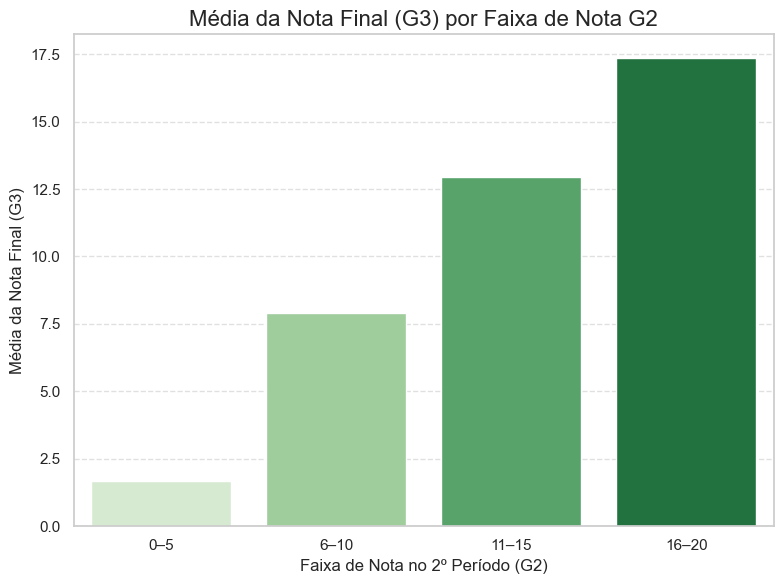

In [52]:
# Calcular correlação de Pearson entre G2 e G3
pearson_corr_g2_g3, pearson_p_g2_g3 = pearsonr(df['G2'], df['G3'])

# Exibir os resultados
print("CORRELAÇÃO DE PEARSON: Nota G2 vs Nota Final G3")
print("="*60)
print(f"Coeficiente de Pearson: {pearson_corr_g2_g3:.4f}")
print(f"Valor p: {pearson_p_g2_g3:.4f}")

if pearson_p_g2_g3 < 0.05:
    print("\n✅ Existe uma correlação linear estatisticamente significativa entre G2 e G3.")
else:
    print("\n❌ Não há correlação linear significativa entre G2 e G3.")
# Criar faixas para G2
bins = [0, 5, 10, 15, 20]
labels = ['0–5', '6–10', '11–15', '16–20']
df['faixa_G2'] = pd.cut(df['G2'], bins=bins, labels=labels, include_lowest=True)

# Calcular a média de G3 para cada faixa de G2
media_g3_por_faixa_g2 = df.groupby('faixa_G2')['G3'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=media_g3_por_faixa_g2, x='faixa_G2', y='G3', palette='Greens')

plt.title('Média da Nota Final (G3) por Faixa de Nota G2', fontsize=16)
plt.xlabel('Faixa de Nota no 2º Período (G2)', fontsize=12)
plt.ylabel('Média da Nota Final (G3)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
